In [1]:
# Manage imports
import requests
import pandas as pd
import re
import ast
import os
from os import listdir
from os.path import isfile, join
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier


In [3]:
# Implementing machine model in SkLearn to see what the most common words are in each category.

df_balanced = pd.read_csv("../data/final_data_version.csv")
df_balanced['description'] = df_balanced['description'].astype(str).str.replace('\n', ' ').str.strip()
df_balanced['description'] = df_balanced['description'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]+', '', x))
df_balanced['description'] = df_balanced['description'].apply(lambda x: x.lower())


vectorizer = CountVectorizer(
    stop_words='english',
    max_features=8000, 
    ngram_range=(1,2),
    min_df=75
)
categories = df_balanced['category'].unique()
print(categories)
for category in categories: 
    df_category = df_balanced[df_balanced['category'] == category]
    history = vectorizer.fit_transform(df_category['description'])

    word_counts = history.sum(axis=0).A1
    words = vectorizer.get_feature_names_out()
    sorted_indices = word_counts.argsort()[::-1]
    top_words = [words[i] for i in sorted_indices[:20]]
    print(f"Top 20 Words for category '{category}': {top_words}")


['art' 'business/finance' 'fantasy/horror' 'food' 'history' 'humanities'
 'psychology' 'religion/spirituality' 'romance' 'science'
 'science fiction' 'slice of life' 'thriller']
Top 20 Words for category 'art': ['book', 'new', 'art', 'design', 'work', 'world', 'techniques', 'projects', 'including', 'history', 'artists', 'life', 'guide', 'time', 'make', 'years', 'color', 'music', 'collection', 'create']
Top 20 Words for category 'business/finance': ['book', 'new', 'business', 'world', 'people', 'work', 'financial', 'life', 'economic', 'social', 'time', 'make', 'management', 'way', 'money', 'help', 'years', 'change', 'guide', 'shows']
Top 20 Words for category 'fantasy/horror': ['world', 'new', 'life', 'time', 'love', 'book', 'shes', 'just', 'story', 'magic', 'years', 'series', 'dark', 'human', 'war', 'ancient', 'like', 'way', 'power', 'man']
Top 20 Words for category 'food': ['food', 'book', 'recipes', 'new', 'world', 'life', 'make', 'guide', 'cooking', 'wine', 'like', 'garden', 'home',

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=3)
clf = MultinomialNB()

X = cv.fit_transform(df_balanced.description)

print(X)

  (0, 53397)	1
  (0, 52603)	2
  (0, 51904)	9
  (0, 54353)	1
  (0, 32382)	1
  (0, 36569)	5
  (0, 51768)	1
  (0, 2880)	5
  (0, 50697)	1
  (0, 55734)	1
  (0, 56791)	1
  (0, 43872)	1
  (0, 3785)	1
  (0, 19543)	1
  (0, 52150)	2
  (0, 6698)	1
  (0, 12221)	1
  (0, 18093)	1
  (0, 20833)	2
  (0, 24615)	5
  (0, 497)	1
  (0, 47345)	1
  (0, 19536)	2
  (0, 39580)	1
  (0, 21294)	1
  :	:
  (58462, 52969)	4
  (58462, 18087)	1
  (58462, 37922)	1
  (58462, 49014)	1
  (58462, 34979)	3
  (58462, 2024)	1
  (58462, 6505)	1
  (58462, 43060)	1
  (58462, 31100)	1
  (58462, 44017)	1
  (58462, 23248)	2
  (58462, 51523)	2
  (58462, 50576)	1
  (58462, 52401)	1
  (58462, 31016)	2
  (58462, 54310)	1
  (58462, 54900)	1
  (58462, 2892)	2
  (58462, 17118)	2
  (58462, 19472)	1
  (58462, 39440)	1
  (58462, 18981)	1
  (58462, 47148)	1
  (58462, 35304)	1
  (58462, 51530)	1


In [58]:
clf.fit(X, df_balanced.category)

MultinomialNB()

In [60]:
clf.score(X, df_balanced.category)

0.6788567127927065

In [62]:
import numpy as np
imatrix = np.eye(X.shape[1])
probs = clf.predict_proba(imatrix)
print(probs[0])
print(clf.classes_)

ind = np.argsort(probs[:,0])[::-1]
print(ind)
print(probs[:,0][ind[0]])

words = cv.get_feature_names_out()
ind = np.argsort(probs[:,0])[::-1]
print(words[ind][:10])

In [17]:
for idx, cl in enumerate(clf.classes_):
    ind = np.argsort(probs[:,idx])[::-1] # this was inside the parenthesis and it needed to be moved out.
    print(ind,probs[:,idx][::-1] )
    top_words = words[ind][:10]
    bottom_words = words[ind][:-10:-1]
    print("Words most associated with class {0}".format(cl))
    for word in top_words:
        print(word)

# min_df raise this and do a search for word and when labeled - order them by prob and see which ones are most probable per class. 

[12554 49632 16990 ... 51330 11763 57040] [0.07041609 0.07386112 0.04416353 ... 0.04510255 0.04438078 0.14167675]
Words most associated with class art
crochet
stitches
embroidery
knitted
jewelry
quilts
quilting
bead
knits
origami
[27250  7647 27254 ... 34630  3844 50501] [0.05214752 0.21879513 0.32705861 ... 0.06680253 0.03286675 0.05246025]
Words most associated with class business/finance
investing
buffett
investors
accounting
investment
investor
finance
entrepreneurship
economists
valuation
[ 3803 33156 38787 ... 36310 10159 52003] [0.05902217 0.06190976 0.0370175  ... 0.03780458 0.0371996  0.05937613]
Words most associated with class fantasy/horror
arthurian
mermaid
persephone
fae
arthurs
lancelot
mage
sookie
garou
guinevere
[55313 11753 15006 ... 51330 55188  5188] [0.05630757 0.05906236 0.03531496 ... 0.03606584 0.03548868 0.05664525]
Words most associated with class food
vegan
cookbook
dishes
desserts
recipes
wines
gardeners
culinary
vegetables
flavors
[27791 11136  3318 ... 468

In [86]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
# Split my data
(X_train, X_test, y_train, y_test) = train_test_split(df_balanced.description, df_balanced.category, test_size=0.2, random_state=42)

In [20]:
# Test Logistic Regression Model with DataSet starting with range (1,2) and features at 5,000

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

logistic_regression_model_1 = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('clf', LogisticRegression(max_iter=300))
])

# Report from Logistic Regression testing - Baseline
logistic_regression_model_1.fit(X_train, y_train)
y_pred = logistic_regression_model_1.predict(X_test)
print(classification_report(y_test, y_pred))

                       precision    recall  f1-score   support

                  art       0.58      0.59      0.58       919
     business/finance       0.70      0.67      0.69       908
       fantasy/horror       0.54      0.54      0.54       887
                 food       0.80      0.61      0.69       866
              history       0.49      0.57      0.53       867
           humanities       0.45      0.51      0.47       881
           psychology       0.40      0.32      0.36       919
religion/spirituality       0.59      0.54      0.56       885
              romance       0.64      0.72      0.67       922
              science       0.54      0.62      0.58       905
      science fiction       0.58      0.54      0.56       894
        slice of life       0.52      0.52      0.52       908
             thriller       0.62      0.64      0.63       932

             accuracy                           0.57     11693
            macro avg       0.57      0.57      0.57 

From the Logistic Regression testing we can see that descriptions that likely have the most unique descriptions that enable them to be easily identifyable are business/finance(71% precision), romance(61% precision), spirituality(60% precision) and thriller(59% precision).

The ones that did the weakest in being identified are culture/folklore(31% accuracy), humanities(31% accuracy), general fiction (42% accuracy), and psychology (43% accuracy). This could be due to overlapping words that exist between the genres/categories.



In [22]:
# Test Logistic Regression Model with DataSet starting with range (1,5) and features at 20,000
# Attempting once again by upping max_features to 20,000 most common terms
# uping consecutive words 1 to 5 and setting sublinear_tf to true to reduce impact on frequent wording
logistic_regression_model_2 = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=20000, ngram_range=(1, 5), sublinear_tf=True)),
    ('clf', LogisticRegression(max_iter=300))
])

# Report from Logistic Regression testing - Baseline
logistic_regression_model_2.fit(X_train, y_train)
y_pred = logistic_regression_model_2.predict(X_test)
print(classification_report(y_test, y_pred))

                       precision    recall  f1-score   support

                  art       0.61      0.61      0.61       919
     business/finance       0.73      0.68      0.70       908
       fantasy/horror       0.57      0.58      0.57       887
                 food       0.81      0.62      0.70       866
              history       0.50      0.59      0.54       867
           humanities       0.46      0.53      0.49       881
           psychology       0.43      0.34      0.38       919
religion/spirituality       0.60      0.55      0.57       885
              romance       0.65      0.74      0.69       922
              science       0.54      0.66      0.60       905
      science fiction       0.61      0.56      0.58       894
        slice of life       0.56      0.55      0.56       908
             thriller       0.67      0.67      0.67       932

             accuracy                           0.59     11693
            macro avg       0.59      0.59      0.59 

In [23]:
# Test Logistic Regression Model with DataSet starting with range (1,3) and features at 10,000
# Attempting once again by upping max_features to 10,000 most common terms
# uping consecutive words 1 to 3 and setting sublinear_tf to true to reduce impact on frequent wording
logistic_regression_model_2 = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 3), sublinear_tf=True)),
    ('clf', LogisticRegression(max_iter=300))
])

# Report from Logistic Regression testing - Baseline
logistic_regression_model_2.fit(X_train, y_train)
y_pred = logistic_regression_model_2.predict(X_test)
print(classification_report(y_test, y_pred))

                       precision    recall  f1-score   support

                  art       0.61      0.60      0.60       919
     business/finance       0.72      0.68      0.70       908
       fantasy/horror       0.56      0.56      0.56       887
                 food       0.80      0.61      0.70       866
              history       0.50      0.59      0.54       867
           humanities       0.45      0.51      0.48       881
           psychology       0.40      0.31      0.35       919
religion/spirituality       0.59      0.56      0.57       885
              romance       0.64      0.74      0.69       922
              science       0.55      0.65      0.59       905
      science fiction       0.60      0.56      0.58       894
        slice of life       0.55      0.53      0.54       908
             thriller       0.64      0.65      0.65       932

             accuracy                           0.58     11693
            macro avg       0.58      0.58      0.58 

Through increasing the params we see that the bottom categories are now more defined with humanities and culture/folklore still being lower than the others with only slight improvement

In [25]:
# Test Logistic Regression Model with DataSet starting with range (1,3) and features at 20,000
# Attempting once again by upping max_features to 20,000 most common terms
# uping consecutive words between 1 and 3 and setting sublinear_tf to true to reduce impact on frequent wording
logistic_regression_model_3 = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=20000, ngram_range=(1, 3), sublinear_tf=True)),
    ('clf', LogisticRegression(max_iter=300))
])

# Report from Logistic Regression testing - Baseline
logistic_regression_model_3.fit(X_train, y_train)
y_pred = logistic_regression_model_3.predict(X_test)
print(classification_report(y_test, y_pred))

                       precision    recall  f1-score   support

                  art       0.62      0.61      0.62       919
     business/finance       0.73      0.68      0.71       908
       fantasy/horror       0.57      0.57      0.57       887
                 food       0.81      0.62      0.70       866
              history       0.50      0.59      0.54       867
           humanities       0.46      0.53      0.49       881
           psychology       0.43      0.33      0.37       919
religion/spirituality       0.60      0.56      0.58       885
              romance       0.65      0.74      0.69       922
              science       0.55      0.65      0.59       905
      science fiction       0.61      0.56      0.58       894
        slice of life       0.56      0.55      0.56       908
             thriller       0.67      0.67      0.67       932

             accuracy                           0.59     11693
            macro avg       0.59      0.59      0.59 

# Logistic Regression Analysis
The model that produced the best results in the report separating the different categories was when max_features=20000, ngram_range=(1, 3). This can be seen in how the precision and recall increased over the other experiments.

From the Logistic Regression testing we can see that descriptions that likely have the most unique descriptions that enable them to be easily identifyable are business/finance(73% precision), food(81% precision), romance(64% precision) and thriller(67% precision).

The ones that did the weakest in being identified are psychology(43% precision), humanities(46% precision), and history (51% accuracy). This most likely is due to overlapping words that exist between the genres/categories.

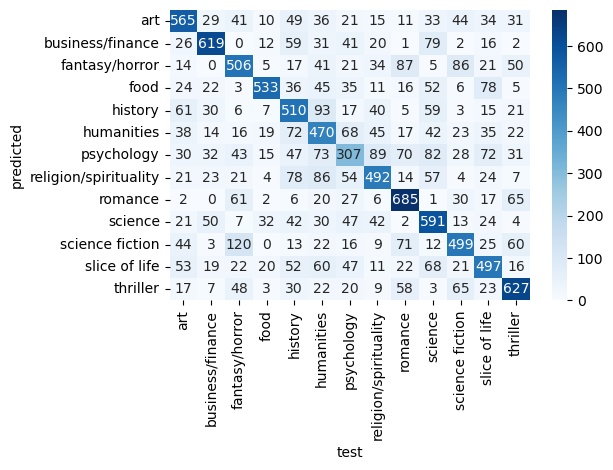

[[565  29  41  10  49  36  21  15  11  33  44  34  31]
 [ 26 619   0  12  59  31  41  20   1  79   2  16   2]
 [ 14   0 506   5  17  41  21  34  87   5  86  21  50]
 [ 24  22   3 533  36  45  35  11  16  52   6  78   5]
 [ 61  30   6   7 510  93  17  40   5  59   3  15  21]
 [ 38  14  16  19  72 470  68  45  17  42  23  35  22]
 [ 30  32  43  15  47  73 307  89  70  82  28  72  31]
 [ 21  23  21   4  78  86  54 492  14  57   4  24   7]
 [  2   0  61   2   6  20  27   6 685   1  30  17  65]
 [ 21  50   7  32  42  30  47  42   2 591  13  24   4]
 [ 44   3 120   0  13  22  16   9  71  12 499  25  60]
 [ 53  19  22  20  52  60  47  11  22  68  21 497  16]
 [ 17   7  48   3  30  22  20   9  58   3  65  23 627]]


In [26]:
matrix = confusion_matrix(y_test, y_pred, labels=clf.classes_)
matrix_p = matrix/matrix.sum(axis=1)
sns.heatmap(matrix, annot=True, fmt = "d", cmap="Blues",yticklabels =clf.classes_,xticklabels=clf.classes_)
plt.title("",  pad=15)
plt.xlabel("test")
plt.ylabel("predicted")
plt.tight_layout()
plt.show()
print(matrix)

# Confusion Matrix for the Final Logistic Regression

We can see that most of the categories separate out well in the Logistic Regression. There is one call out however, this is between fantasy/horror and science fiction. These two seem to contain overlapping descriptive words between the two genres naturally. Data has been rearranged to prevent this, however, this persists even with delineating these two broad categories. Therefore, a more intensive model will be needed to train the data and find more meaningful patterns in this project.

Classification Report:

                       precision    recall  f1-score   support

                  art      0.524     0.538     0.531       919
     business/finance      0.629     0.650     0.639       908
       fantasy/horror      0.545     0.442     0.488       887
                 food      0.735     0.605     0.664       866
              history      0.414     0.517     0.459       867
           humanities      0.387     0.395     0.391       881
           psychology      0.390     0.124     0.188       919
religion/spirituality      0.511     0.537     0.524       885
              romance      0.488     0.721     0.582       922
              science      0.457     0.575     0.509       905
      science fiction      0.531     0.436     0.479       894
        slice of life      0.461     0.498     0.479       908
             thriller      0.577     0.595     0.586       932

             accuracy                          0.510     11693
            macro avg      0.

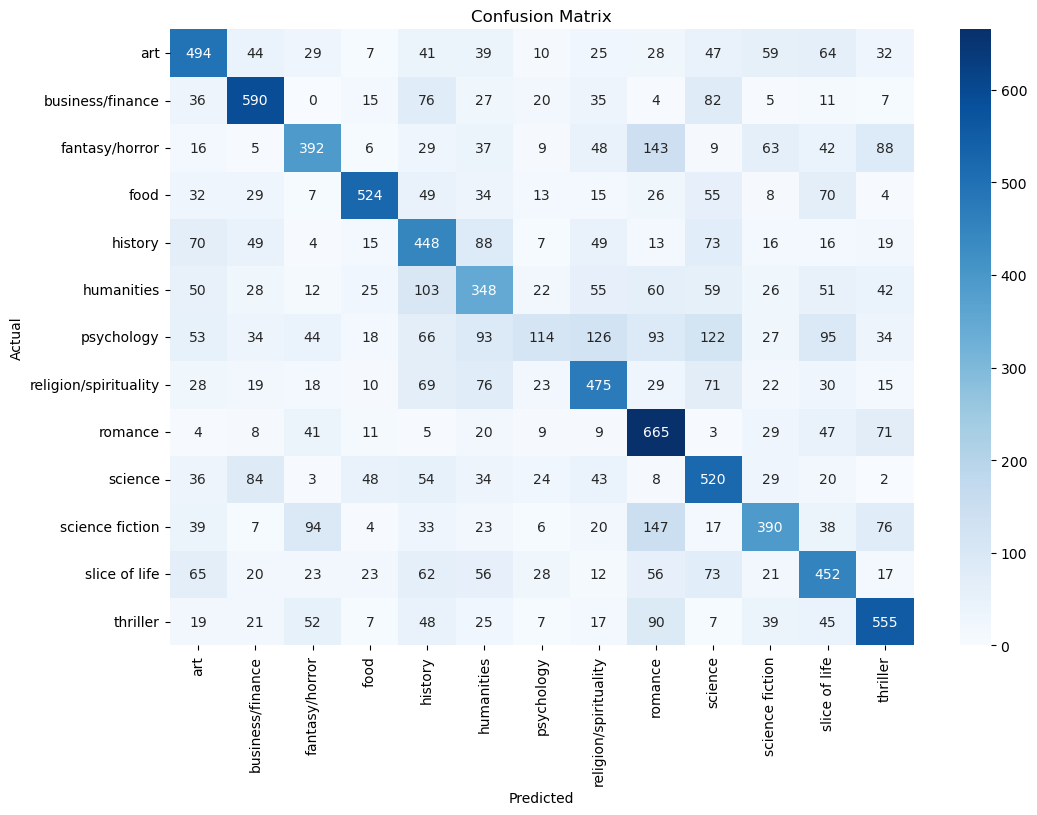

In [28]:
# Random Forest testing with 10,000 features and range (1,3) with 200 estimators

tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,3),
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Random Forest classifier
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train_tfidf, y_train)

# Predictions
y_pred = rf.predict(X_test_tfidf)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=df_balanced['category'].unique(),
            yticklabels=df_balanced['category'].unique(), cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Classification Report:

                       precision    recall  f1-score   support

                  art      0.536     0.550     0.542       919
     business/finance      0.635     0.655     0.645       908
       fantasy/horror      0.551     0.441     0.490       887
                 food      0.746     0.606     0.669       866
              history      0.422     0.518     0.465       867
           humanities      0.404     0.419     0.411       881
           psychology      0.427     0.134     0.204       919
religion/spirituality      0.524     0.548     0.536       885
              romance      0.489     0.732     0.586       922
              science      0.469     0.610     0.531       905
      science fiction      0.548     0.440     0.488       894
        slice of life      0.462     0.494     0.478       908
             thriller      0.583     0.605     0.594       932

             accuracy                          0.520     11693
            macro avg      0.

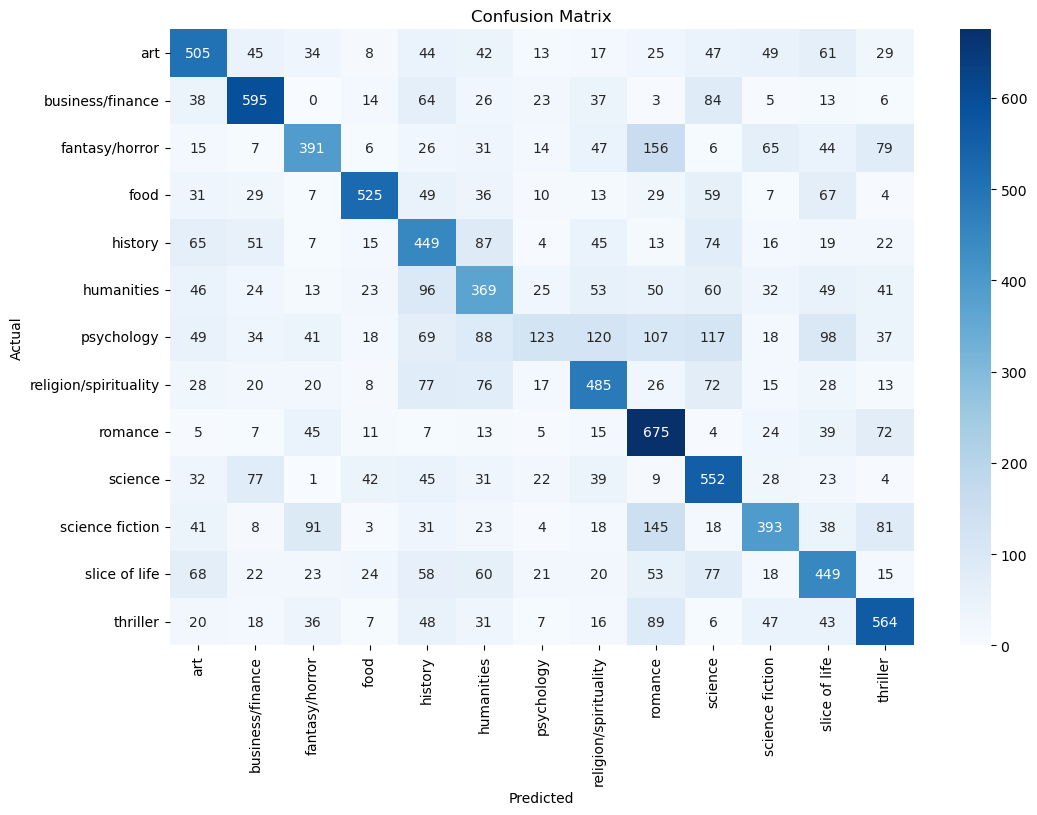

In [29]:
# Random Forest testing with 20,000 features and range (1,5) with 200 estimators

tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1,5),
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Random Forest classifier
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train_tfidf, y_train)

# Predictions
y_pred = rf.predict(X_test_tfidf)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_,
            yticklabels=clf.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Classification Report:

                       precision    recall  f1-score   support

                  art      0.531     0.543     0.537       919
     business/finance      0.631     0.660     0.645       908
       fantasy/horror      0.529     0.449     0.486       887
                 food      0.737     0.610     0.668       866
              history      0.421     0.526     0.468       867
           humanities      0.397     0.401     0.399       881
           psychology      0.426     0.144     0.215       919
religion/spirituality      0.519     0.537     0.528       885
              romance      0.492     0.729     0.587       922
              science      0.461     0.590     0.517       905
      science fiction      0.540     0.432     0.480       894
        slice of life      0.470     0.494     0.482       908
             thriller      0.579     0.587     0.583       932

             accuracy                          0.516     11693
            macro avg      0.

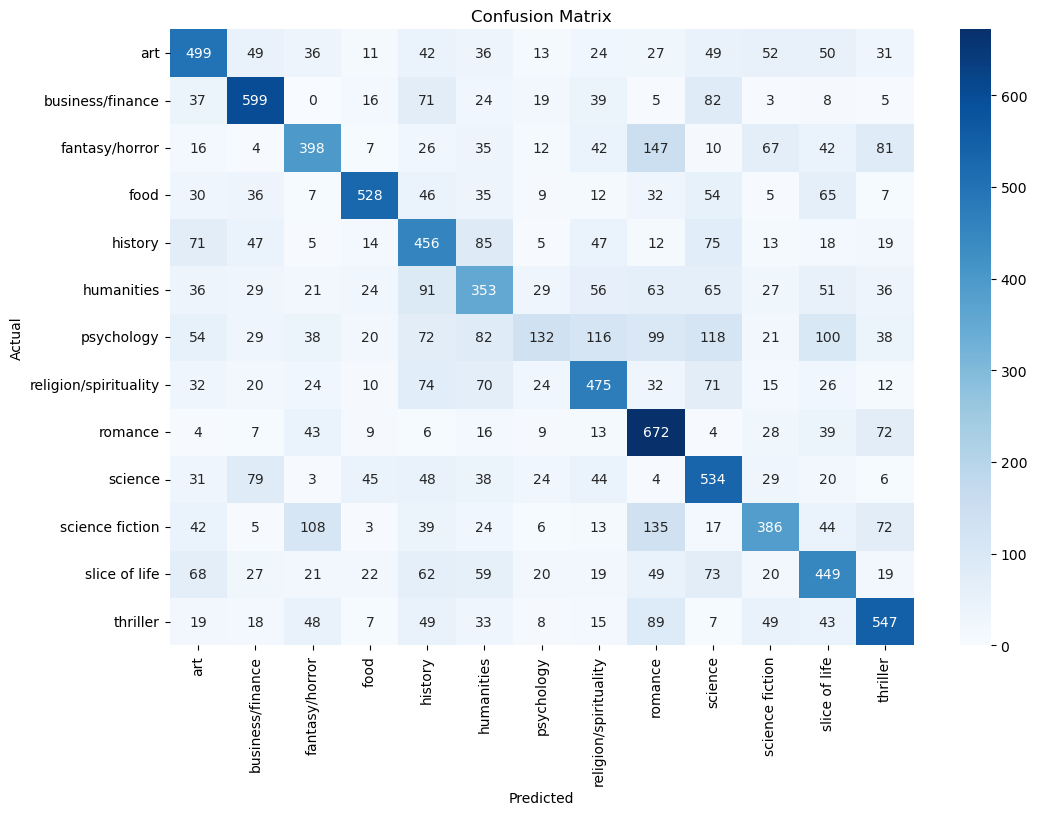

In [30]:
# Random Forest testing with 20,000 features and range (1,3) with 100 estimators

tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1,3),
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Random Forest classifier
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train_tfidf, y_train)

# Predictions
y_pred = rf.predict(X_test_tfidf)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_,
            yticklabels=clf.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Classification Report:

                       precision    recall  f1-score   support

                  art      0.541     0.542     0.541       919
     business/finance      0.642     0.673     0.657       908
       fantasy/horror      0.568     0.469     0.514       887
                 food      0.731     0.611     0.665       866
              history      0.430     0.529     0.474       867
           humanities      0.400     0.411     0.406       881
           psychology      0.410     0.126     0.193       919
religion/spirituality      0.531     0.550     0.540       885
              romance      0.494     0.740     0.593       922
              science      0.476     0.602     0.532       905
      science fiction      0.536     0.436     0.481       894
        slice of life      0.465     0.508     0.486       908
             thriller      0.593     0.603     0.598       932

             accuracy                          0.523     11693
            macro avg      0.

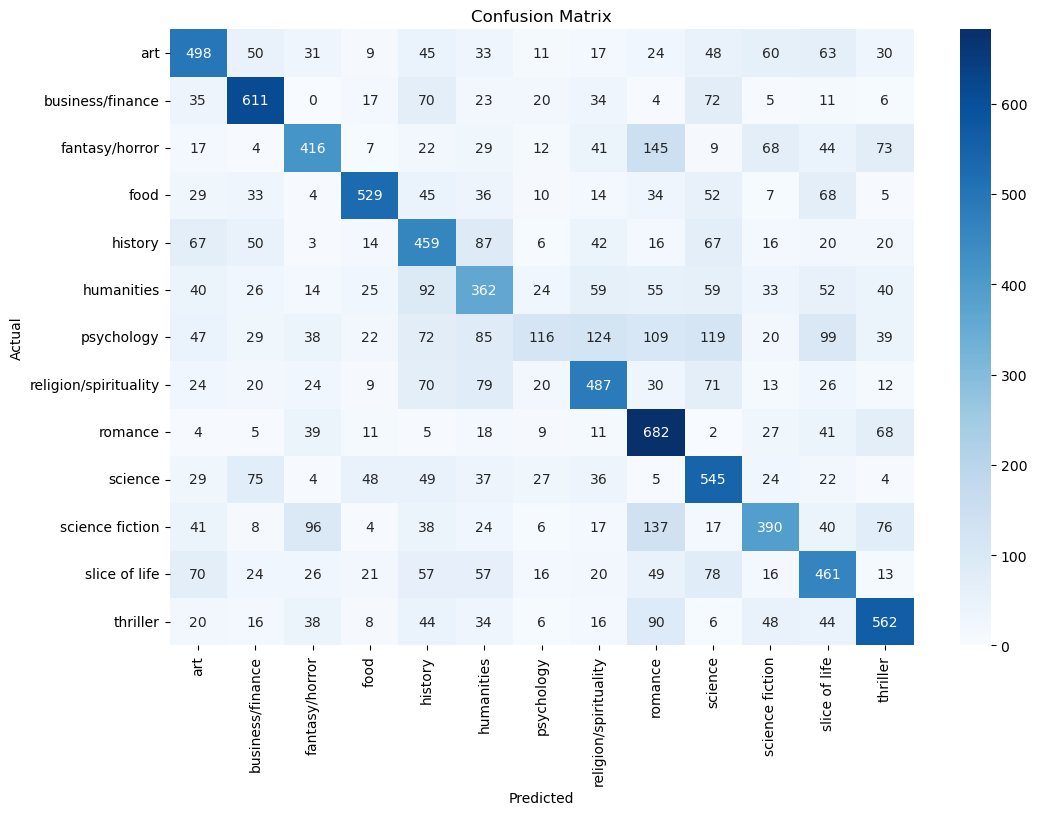

In [31]:
# Random Forest testing with 20,000 features and range (1,5) with 300 estimators

tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1,5),
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Random Forest classifier
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train_tfidf, y_train)

# Predictions
y_pred = rf.predict(X_test_tfidf)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_,
            yticklabels=clf.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Random Forest Analysis

Of the following models the parameters that produce the best results are Random Forest testing with 20,000 features and range (1,5) with 300 estimators. This allows a wider range of words to be analyze and be compared to one another. 

However, this model does not do an accurate job concerning psychology and it is difficult to differentiate meaningful psychology words and phrase to that of religion/spirituality and even tapping into romance. The differences when tuning the models are negliable based on the results seen above. For this assignment, this model should not be considered further based upon exploration. 


In [33]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [19:13:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:

                       precision    recall  f1-score   support

                  art      0.581     0.603     0.592       919
     business/finance      0.719     0.666     0.692       908
       fantasy/horror      0.559     0.538     0.548       887
                 food      0.761     0.647     0.699       866
              history      0.483     0.551     0.515       867
           humanities      0.454     0.490     0.471       881
           psychology      0.428     0.335     0.376       919
religion/spirituality      0.591     0.569     0.580       885
              romance      0.599     0.687     0.640       922
              science      0.529     0.620     0.571       905
      science fiction      0.572     0.532     0.552       894
        slice of life      0.505     0.522     0.513       908
             thriller      0.626     0.609     0.617       932

             accuracy                          0.567     11693
            macro avg      0.

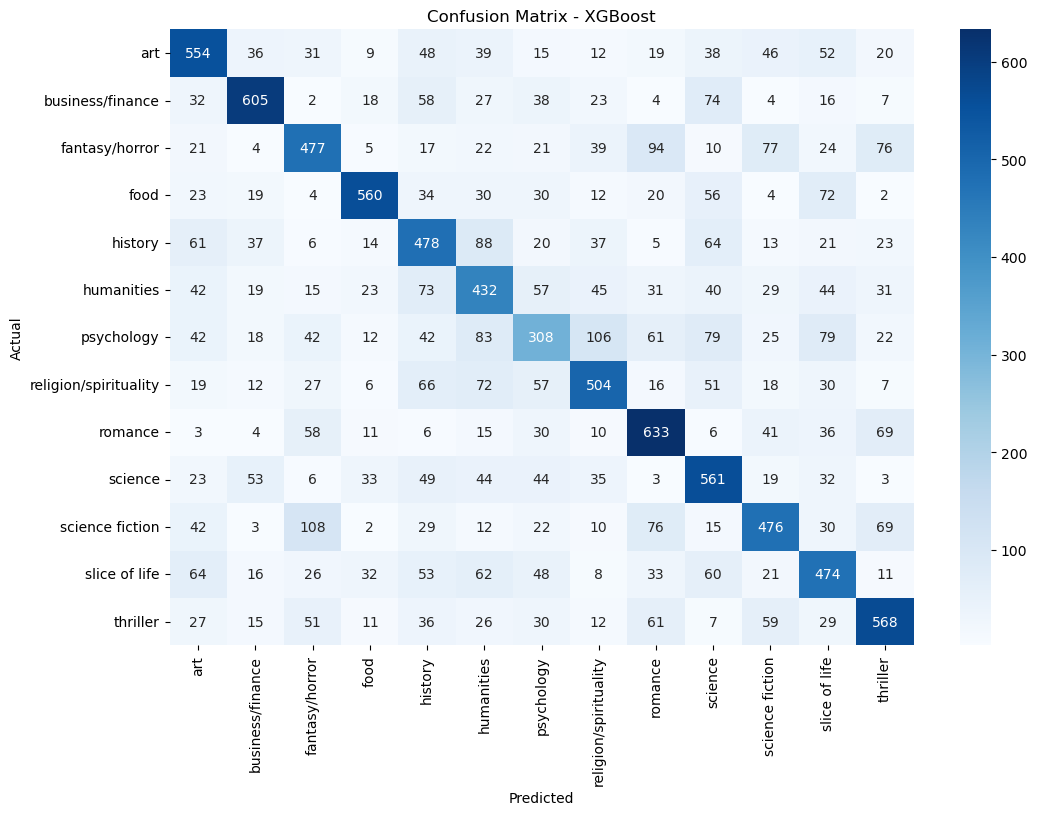

In [34]:
# XGBoost Model

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Train XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='hist',
    use_label_encoder=False,   # prevent legacy warning
    eval_metric='mlogloss'     # proper multi-class metric
)

xgb.fit(X_train_tfidf, y_train_enc)

# Predictions
y_pred_enc = xgb.predict(X_test_tfidf)

# Decode predictions back to labels
y_pred = le.inverse_transform(y_pred_enc)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_,
            yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [95]:
!pip install xgboost

In [97]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.decomposition import TruncatedSVD
# Encode target labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
num_classes = len(le.classes_)

In [106]:
tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1,5),
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1]
}

xgb_clf = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    random_state=42,
    tree_method='hist',
    eval_metric='mlogloss'
)

search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='f1_macro',
    verbose=2,
    n_jobs=-1
)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=200, subsample=1.0; total time=58.0min
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0; total time=32.2min
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8; total time=33.0min
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=200, subsample=0.8; total time= 8.4min
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8; total time=11.2min
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=19.1min
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_de

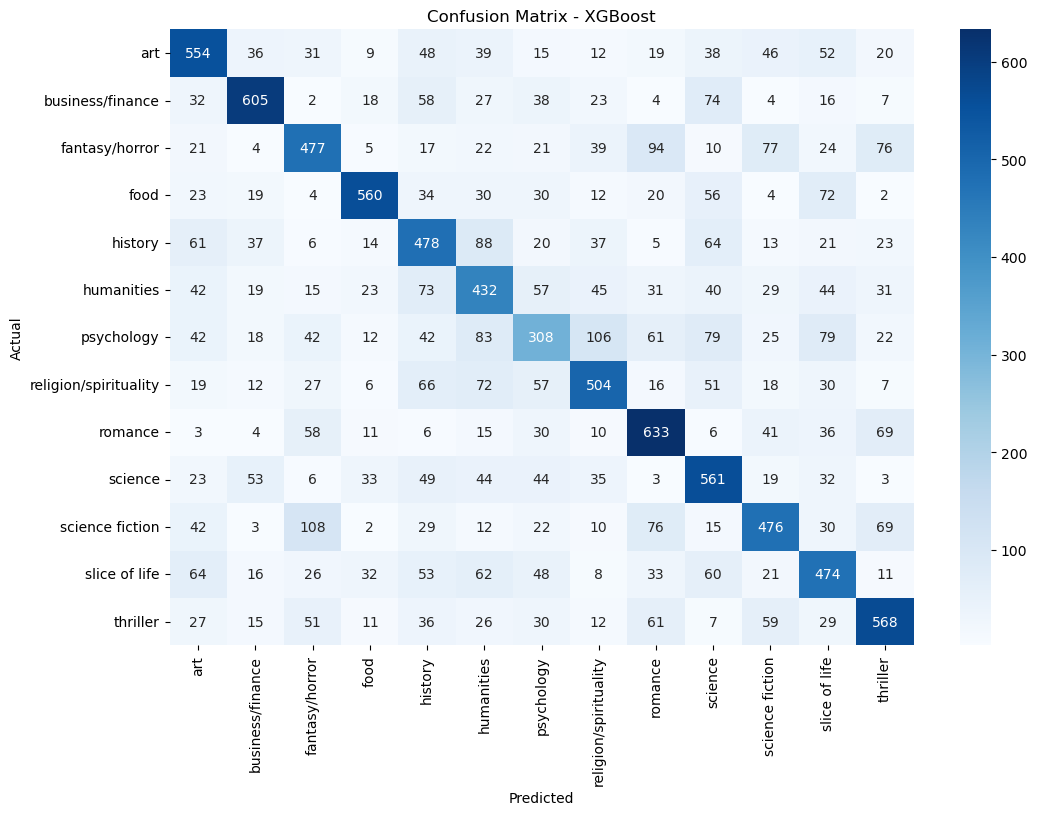

In [45]:
search.fit(X_train_tfidf, y_train_enc)
print("Best params:", search.best_params_)
print("Best score:", search.best_score_)


# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_,
            yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# Analysis of XGBoost

Based on this model there is much more clarification of the separate categories. The weakest still exists as psychology which still shares common descriptive words as that of religion/spirituality. However, the other categories are quite differentiated overall. The only other note is that science fiction and fantasy/horror do overlap a bit more prominently in this model. The reason this stands out is because there are less simularities between categories than previous models. However, it is apparent that moving on to deep learning models will be a necessary step forward. 

# Begin Deep Learning Performed Below

In [125]:
!pip install --upgrade datasets==3.0.1 --quiet


Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install transformers datasets torch
# !pip install --upgrade --force-reinstall pyarrow==16.1.0 --no-deps -q
!pip install -U transformers datasets accelerate

# import importlib, pyarrow
# importlib.reload(pyarrow)

from datasets import Dataset

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [9]:
# For Performance Reasons Reduce Testing Samples to a Smaller Size
# Ensure that balance is maintained between all categories
df_small = (
    df_balanced
    .groupby('category', group_keys=False)
    .apply(lambda x: x.sample(min(len(x), 500), random_state=42))
)

# check to be sure that all balanced for sample size
for category in df_small['category'].unique():
    print(f"Category: {category}")
    print(df_small[df_small['category'] == category]['category'].value_counts())

# Split data on smaller sample size
(X_train, X_test, y_train, y_test) = train_test_split(
    df_small.description,
    df_small.category,
    test_size=0.2,
    stratify=df_small.category,
    random_state=42
)

tfidf = TfidfVectorizer(
    max_features=2000,     
    stop_words='english',   
    ngram_range=(1, 3)      
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

/var/folders/gs/rm1mjp5x5ybc93h8m4xwbfyr0000gn/T/ipykernel_49315/1682434812.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), 500), random_state=42))


Category: art
category
art    500
Name: count, dtype: int64
Category: business/finance
category
business/finance    500
Name: count, dtype: int64
Category: fantasy/horror
category
fantasy/horror    500
Name: count, dtype: int64
Category: food
category
food    500
Name: count, dtype: int64
Category: history
category
history    500
Name: count, dtype: int64
Category: humanities
category
humanities    500
Name: count, dtype: int64
Category: psychology
category
psychology    500
Name: count, dtype: int64
Category: religion/spirituality
category
religion/spirituality    500
Name: count, dtype: int64
Category: romance
category
romance    500
Name: count, dtype: int64
Category: science
category
science    500
Name: count, dtype: int64
Category: science fiction
category
science fiction    500
Name: count, dtype: int64
Category: slice of life
category
slice of life    500
Name: count, dtype: int64
Category: thriller
category
thriller    500
Name: count, dtype: int64


In [15]:
!pip uninstall -y keras tensorflow
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install transformers


Found existing installation: keras 3.11.3
Uninstalling keras-3.11.3:
  Successfully uninstalled keras-3.11.3
Found existing installation: tensorflow 2.20.0
Uninstalling tensorflow-2.20.0:
  Successfully uninstalled tensorflow-2.20.0
Looking in indexes: https://download.pytorch.org/whl/cpu


In [19]:
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch

!pip install ipywidgets
# jupyter nbextension enable --py widgetsnbextension --sys-prefix
!pip install jupyterlab_widgets

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [100]:
# Experiment using the BERT

# Prepare data
le = LabelEncoder()
df_small['label'] = le.fit_transform(df_small['category'])

# Ensure correct column name
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_small['description'],
    df_small['label'],
    test_size=0.2,
    stratify=df_small['label'],
    random_state=42
)

# Convert to Hugging Face Datasets
train_dataset = Dataset.from_dict({'text': train_texts.tolist(), 'label': train_labels.tolist()})
test_dataset  = Dataset.from_dict({'text': test_texts.tolist(),  'label': test_labels.tolist()})

# bert Model
bert_model = "bert-base-uncased"

tokenizer_bert = AutoTokenizer.from_pretrained(bert_model)

def tokenize(batch):
    return tokenizer_bert(batch['text'], padding='max_length', truncation=True, max_length=256)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset  = test_dataset.map(tokenize, batched=True)

train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

# Load model
num_labels = len(le.classes_)
model = AutoModelForSequenceClassification.from_pretrained(bert_model, num_labels=num_labels)

# Training config
training_args = TrainingArguments(
    output_dir="./results",
    do_eval=True,                 # instead of evaluation_strategy
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100
)


# Trainer
trainer_bert = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer_bert
)

# Train
trainer_bert.train()


Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/var/folders/gs/rm1mjp5x5ybc93h8m4xwbfyr0000gn/T/ipykernel_49315/4167487073.py:53: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_bert = Trainer(
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
100,2.089500
200,1.551800
300,1.237200
400,1.145100
500,1.100400
600,0.884900
700,0.818500
800,0.768100
900,0.779600
1000,0.769100


/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=1500, training_loss=0.9236502151489258, metrics={'train_runtime': 829.1125, 'train_samples_per_second': 14.473, 'train_steps_per_second': 1.809, 'total_flos': 1578779725824000.0, 'train_loss': 0.9236502151489258, 'epoch': 3.0})

In [29]:
# Experiment using the DistilBERT

# Prepare data
le = LabelEncoder()
df_small['label'] = le.fit_transform(df_small['category'])

# Ensure correct column name
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_small['description'],
    df_small['label'],
    test_size=0.2,
    stratify=df_small['label'],
    random_state=42
)

# Convert to Hugging Face Datasets
train_dataset = Dataset.from_dict({'text': train_texts.tolist(), 'label': train_labels.tolist()})
test_dataset  = Dataset.from_dict({'text': test_texts.tolist(),  'label': test_labels.tolist()})

# distilbert Model
distilbert_model = "distilbert-base-uncased"

tokenizer_distilbert = AutoTokenizer.from_pretrained(distilbert_model)

def tokenize(batch):
    return tokenizer_distilbert(batch['text'], padding='max_length', truncation=True, max_length=256)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset  = test_dataset.map(tokenize, batched=True)

train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

# Load model
num_labels = len(le.classes_)
model = AutoModelForSequenceClassification.from_pretrained(distilbert_model, num_labels=num_labels)

# Training config
training_args = TrainingArguments(
    output_dir="./results",
    do_eval=True,                 # instead of evaluation_strategy
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100
)

# Trainer
trainer_distilbert = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer_distilbert
)

# Train
trainer_distilbert.train()


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/5200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1300 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/var/folders/gs/rm1mjp5x5ybc93h8m4xwbfyr0000gn/T/ipykernel_49315/1693505613.py:52: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_distilbert = Trainer(
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
100,2.417100
200,1.998400
300,1.735200
400,1.541100
500,1.486400
600,1.460600
700,1.311200
800,1.217200
900,1.164000
1000,1.133500


/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=1950, training_loss=1.2580616075564655, metrics={'train_runtime': 541.8588, 'train_samples_per_second': 28.79, 'train_steps_per_second': 3.599, 'total_flos': 1033448400691200.0, 'train_loss': 1.2580616075564655, 'epoch': 3.0})

In [31]:
# Evaluate Bert Model
preds_output_bert = trainer_bert.predict(test_dataset)
y_pred_bert = preds_output_bert.predictions.argmax(axis=1)
print(classification_report(test_labels, y_pred_bert, target_names=le.classes_))

# Evaluate Distilbert Model
preds_output_distilbert = trainer_distilbert.predict(test_dataset)
y_pred_distilbert = preds_output_distilbert.predictions.argmax(axis=1)
print(classification_report(test_labels, y_pred_distilbert, target_names=le.classes_))


/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


                       precision    recall  f1-score   support

                  art       0.58      0.61      0.59       100
     business/finance       0.77      0.81      0.79       100
       fantasy/horror       0.51      0.65      0.57       100
                 food       0.83      0.73      0.78       100
              history       0.59      0.55      0.57       100
           humanities       0.45      0.55      0.49       100
           psychology       0.48      0.45      0.47       100
religion/spirituality       0.65      0.56      0.60       100
              romance       0.80      0.67      0.73       100
              science       0.66      0.69      0.68       100
      science fiction       0.60      0.52      0.56       100
        slice of life       0.56      0.49      0.52       100
             thriller       0.65      0.76      0.70       100

             accuracy                           0.62      1300
            macro avg       0.63      0.62      0.62 

/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


                       precision    recall  f1-score   support

                  art       0.62      0.61      0.61       100
     business/finance       0.76      0.78      0.77       100
       fantasy/horror       0.51      0.64      0.57       100
                 food       0.85      0.68      0.76       100
              history       0.55      0.59      0.57       100
           humanities       0.46      0.53      0.49       100
           psychology       0.51      0.44      0.47       100
religion/spirituality       0.64      0.58      0.61       100
              romance       0.75      0.69      0.72       100
              science       0.64      0.69      0.66       100
      science fiction       0.64      0.55      0.59       100
        slice of life       0.55      0.46      0.50       100
             thriller       0.58      0.71      0.64       100

             accuracy                           0.61      1300
            macro avg       0.62      0.61      0.61 

In [35]:
tfidf = TfidfVectorizer(
    max_features=5000,     
    stop_words='english',   
    ngram_range=(2, 5)      
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [37]:
# Experiment using the BERT

# Prepare data
le = LabelEncoder()
df_small['label'] = le.fit_transform(df_small['category'])

# Ensure correct column name
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_small['description'],
    df_small['label'],
    test_size=0.2,
    stratify=df_small['label'],
    random_state=42
)

# Convert to Hugging Face Datasets
train_dataset = Dataset.from_dict({'text': train_texts.tolist(), 'label': train_labels.tolist()})
test_dataset  = Dataset.from_dict({'text': test_texts.tolist(),  'label': test_labels.tolist()})

# bert Model
bert_model = "bert-base-uncased"

tokenizer_bert = AutoTokenizer.from_pretrained(bert_model)

def tokenize(batch):
    return tokenizer_bert(batch['text'], padding='max_length', truncation=True, max_length=256)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset  = test_dataset.map(tokenize, batched=True)

train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

# Load model
num_labels = len(le.classes_)
model = AutoModelForSequenceClassification.from_pretrained(bert_model, num_labels=num_labels)

# Training config
training_args = TrainingArguments(
    output_dir="./results",
    do_eval=True,                 # instead of evaluation_strategy
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100
)


# Trainer
trainer_bert = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer_bert
)

# Train
trainer_bert.train()


Map:   0%|          | 0/5200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1300 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/var/folders/gs/rm1mjp5x5ybc93h8m4xwbfyr0000gn/T/ipykernel_49315/4167487073.py:53: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_bert = Trainer(
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
100,2.448800
200,2.057200
300,1.737300
400,1.544200
500,1.467900
600,1.414800
700,1.281100
800,1.220000
900,1.105300
1000,1.093400


/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=1950, training_loss=1.2130689963316306, metrics={'train_runtime': 1085.8047, 'train_samples_per_second': 14.367, 'train_steps_per_second': 1.796, 'total_flos': 2052468922982400.0, 'train_loss': 1.2130689963316306, 'epoch': 3.0})

In [39]:
# Experiment using the DistilBERT

# Prepare data
le = LabelEncoder()
df_small['label'] = le.fit_transform(df_small['category'])

# Ensure correct column name
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_small['description'],
    df_small['label'],
    test_size=0.2,
    stratify=df_small['label'],
    random_state=42
)

# Convert to Hugging Face Datasets
train_dataset = Dataset.from_dict({'text': train_texts.tolist(), 'label': train_labels.tolist()})
test_dataset  = Dataset.from_dict({'text': test_texts.tolist(),  'label': test_labels.tolist()})

# distilbert Model
distilbert_model = "distilbert-base-uncased"

tokenizer_distilbert = AutoTokenizer.from_pretrained(distilbert_model)

def tokenize(batch):
    return tokenizer_distilbert(batch['text'], padding='max_length', truncation=True, max_length=256)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset  = test_dataset.map(tokenize, batched=True)

train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

# Load model
num_labels = len(le.classes_)
model = AutoModelForSequenceClassification.from_pretrained(distilbert_model, num_labels=num_labels)

# Training config
training_args = TrainingArguments(
    output_dir="./results",
    do_eval=True,                 # instead of evaluation_strategy
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100
)

# Trainer
trainer_distilbert = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer_distilbert
)

# Train
trainer_distilbert.train()


Map:   0%|          | 0/5200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1300 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/var/folders/gs/rm1mjp5x5ybc93h8m4xwbfyr0000gn/T/ipykernel_49315/1693505613.py:52: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_distilbert = Trainer(
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
100,2.417100
200,1.998500
300,1.734800
400,1.540600
500,1.485900
600,1.460900
700,1.311300
800,1.216300
900,1.164600
1000,1.134100


/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=1950, training_loss=1.258127908951197, metrics={'train_runtime': 647.5476, 'train_samples_per_second': 24.091, 'train_steps_per_second': 3.011, 'total_flos': 1033448400691200.0, 'train_loss': 1.258127908951197, 'epoch': 3.0})

In [40]:
# Evaluate Bert Model
preds_output_bert = trainer_bert.predict(test_dataset)
y_pred_bert = preds_output_bert.predictions.argmax(axis=1)
print(classification_report(test_labels, y_pred_bert, target_names=le.classes_))

# Evaluate Distilbert Model
preds_output_distilbert = trainer_distilbert.predict(test_dataset)
y_pred_distilbert = preds_output_distilbert.predictions.argmax(axis=1)
print(classification_report(test_labels, y_pred_distilbert, target_names=le.classes_))


/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


                       precision    recall  f1-score   support

                  art       0.61      0.63      0.62       100
     business/finance       0.75      0.79      0.77       100
       fantasy/horror       0.54      0.68      0.60       100
                 food       0.76      0.73      0.74       100
              history       0.61      0.56      0.58       100
           humanities       0.47      0.52      0.49       100
           psychology       0.49      0.45      0.47       100
religion/spirituality       0.65      0.57      0.61       100
              romance       0.78      0.72      0.75       100
              science       0.66      0.71      0.68       100
      science fiction       0.63      0.54      0.58       100
        slice of life       0.57      0.50      0.53       100
             thriller       0.65      0.74      0.69       100

             accuracy                           0.63      1300
            macro avg       0.63      0.63      0.63 

/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


                       precision    recall  f1-score   support

                  art       0.62      0.61      0.62       100
     business/finance       0.76      0.78      0.77       100
       fantasy/horror       0.51      0.64      0.57       100
                 food       0.85      0.68      0.76       100
              history       0.54      0.59      0.56       100
           humanities       0.46      0.53      0.49       100
           psychology       0.51      0.44      0.47       100
religion/spirituality       0.63      0.58      0.60       100
              romance       0.75      0.69      0.72       100
              science       0.64      0.69      0.66       100
      science fiction       0.64      0.55      0.59       100
        slice of life       0.55      0.46      0.50       100
             thriller       0.58      0.71      0.64       100

             accuracy                           0.61      1300
            macro avg       0.62      0.61      0.61 

# Deep Learning Analysis

From deep learning, we are seeing that the models are coming in a bit higher than the previous model but still relatively the same percentages. 

At this point the data has been modified to what is seen below. Due to the confusion with multiple categories and overlapping text elements, the Capstone Baseline has been re-run to remove 3 low performing and often more confused categories in an attempt to up the accuracy/precision per category. 

The dataset if reloaded would be updated with this new list in df_balanced. However, in the experimental phase and due to time constraints, I am only using a sample of the descriptions - upped to 5,000 to make up for data lost (well above 15,000 samples still) for the remaining categories. The categories show a little overlap still, but the most ambiguous have been handled in "Capstone_Baseline" document

In [90]:
# Remove psychology and slice of life from categorical data - Limit data more to remove categories
# that contain ambiguity in training the model

# df_small = df_small[df_small['category'] != 'psychology'].reset_index(drop=True)
# df_small = df_small[df_small['category'] != 'slice of life'].reset_index(drop=True)
# df_small = df_small[df_small['category'] != 'humanities'].reset_index(drop=True)


In [92]:
# Experiment using the DistilBERT - but dropped the 2 most ambiguous classes in model

# Prepare data
le = LabelEncoder()
df_small['label'] = le.fit_transform(df_small['category'])

# Ensure correct column name
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_small['description'],
    df_small['label'],
    test_size=0.2,
    stratify=df_small['label'],
    random_state=42
)

# Convert to Hugging Face Datasets
train_dataset = Dataset.from_dict({'text': train_texts.tolist(), 'label': train_labels.tolist()})
test_dataset  = Dataset.from_dict({'text': test_texts.tolist(),  'label': test_labels.tolist()})

# distilbert Model
distilbert_model = "distilbert-base-uncased"

tokenizer_distilbert = AutoTokenizer.from_pretrained(distilbert_model)

def tokenize(batch):
    return tokenizer_distilbert(batch['text'], padding='max_length', truncation=True, max_length=256)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset  = test_dataset.map(tokenize, batched=True)

train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

# Load model
num_labels = len(le.classes_)
model = AutoModelForSequenceClassification.from_pretrained(distilbert_model, num_labels=num_labels)

# Training config
training_args = TrainingArguments(
    output_dir="./results",
    do_eval=True,                 # instead of evaluation_strategy
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100
)

# Trainer
trainer_distilbert = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer_distilbert
)

# Train
trainer_distilbert.train()


Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/var/folders/gs/rm1mjp5x5ybc93h8m4xwbfyr0000gn/T/ipykernel_49315/2064398231.py:52: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_distilbert = Trainer(
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
100,2.038400
200,1.567700
300,1.288400
400,1.179500
500,1.130300
600,0.928300
700,0.887500
800,0.849900
900,0.844800
1000,0.854000


/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=1500, training_loss=0.9911504185994466, metrics={'train_runtime': 420.2644, 'train_samples_per_second': 28.553, 'train_steps_per_second': 3.569, 'total_flos': 794917785600000.0, 'train_loss': 0.9911504185994466, 'epoch': 3.0})

In [93]:
# Evaluate Distilbert Model
preds_output_distilbert = trainer_distilbert.predict(test_dataset)
y_pred_distilbert = preds_output_distilbert.predictions.argmax(axis=1)
print(classification_report(test_labels, y_pred_distilbert, target_names=le.classes_))



/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


                       precision    recall  f1-score   support

                  art       0.72      0.68      0.70       100
     business/finance       0.79      0.80      0.80       100
       fantasy/horror       0.59      0.67      0.63       100
                 food       0.84      0.76      0.80       100
              history       0.67      0.70      0.69       100
religion/spirituality       0.76      0.68      0.72       100
              romance       0.83      0.67      0.74       100
              science       0.71      0.71      0.71       100
      science fiction       0.69      0.65      0.67       100
             thriller       0.60      0.79      0.68       100

             accuracy                           0.71      1000
            macro avg       0.72      0.71      0.71      1000
         weighted avg       0.72      0.71      0.71      1000



In [122]:
# Experiment using the DistilBERT - but 11 classes and upped epochs and reduced learning rate 1e-5.

# Prepare data
le = LabelEncoder()
df_small['label'] = le.fit_transform(df_small['category'])

# Ensure correct column name
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_small['description'],
    df_small['label'],
    test_size=0.2,
    stratify=df_small['label'],
    random_state=42
)

# Convert to Hugging Face Datasets
train_dataset = Dataset.from_dict({'text': train_texts.tolist(), 'label': train_labels.tolist()})
test_dataset  = Dataset.from_dict({'text': test_texts.tolist(),  'label': test_labels.tolist()})

# distilbert Model
distilbert_model = "distilbert-base-uncased"

tokenizer_distilbert = AutoTokenizer.from_pretrained(distilbert_model)

def tokenize(batch):
    return tokenizer_distilbert(batch['text'], padding='max_length', truncation=True, max_length=256)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset  = test_dataset.map(tokenize, batched=True)

train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

# Load model
num_labels = len(le.classes_)
model = AutoModelForSequenceClassification.from_pretrained(distilbert_model, num_labels=num_labels)

# Training config
training_args = TrainingArguments(
    output_dir="./results",
    do_eval=True,                 # instead of evaluation_strategy
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=1e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100
)

# Trainer
trainer_distilbert = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer_distilbert
)

# Train
trainer_distilbert.train()


Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/var/folders/gs/rm1mjp5x5ybc93h8m4xwbfyr0000gn/T/ipykernel_49315/2525869258.py:52: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_distilbert = Trainer(
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
100,2.170600
200,1.861900
300,1.615400
400,1.416600
500,1.300500
600,1.158100
700,1.089400
800,1.038100
900,1.024300
1000,1.015000


/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=2500, training_loss=0.9864085098266602, metrics={'train_runtime': 682.9038, 'train_samples_per_second': 29.287, 'train_steps_per_second': 3.661, 'total_flos': 1324862976000000.0, 'train_loss': 0.9864085098266602, 'epoch': 5.0})

In [123]:
# Evaluate Distilbert Model
preds_output_distilbert = trainer_distilbert.predict(test_dataset)
y_pred_distilbert = preds_output_distilbert.predictions.argmax(axis=1)
print(classification_report(test_labels, y_pred_distilbert, target_names=le.classes_))


/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


                       precision    recall  f1-score   support

                  art       0.73      0.64      0.68       100
     business/finance       0.79      0.80      0.80       100
       fantasy/horror       0.57      0.68      0.62       100
                 food       0.84      0.73      0.78       100
              history       0.66      0.71      0.68       100
religion/spirituality       0.80      0.66      0.72       100
              romance       0.81      0.67      0.73       100
              science       0.68      0.72      0.70       100
      science fiction       0.68      0.65      0.67       100
             thriller       0.60      0.77      0.67       100

             accuracy                           0.70      1000
            macro avg       0.71      0.70      0.71      1000
         weighted avg       0.71      0.70      0.71      1000



In [124]:
tfidf = TfidfVectorizer(
    max_features=20000,     
    stop_words='english',   
    ngram_range=(1, 3)      
)

(X_train, X_test, y_train, y_test) = train_test_split(df_small.description, df_small.category, test_size=0.2, random_state=42)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [125]:
# Experiment using the DistilBERT - attempting with increasing max features and reducing word range

# Prepare data
le = LabelEncoder()
df_small['label'] = le.fit_transform(df_small['category'])

# Ensure correct column name
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_small['description'],
    df_small['label'],
    test_size=0.2,
    stratify=df_small['label'],
    random_state=42
)

# Convert to Hugging Face Datasets
train_dataset = Dataset.from_dict({'text': train_texts.tolist(), 'label': train_labels.tolist()})
test_dataset  = Dataset.from_dict({'text': test_texts.tolist(),  'label': test_labels.tolist()})

# distilbert Model
distilbert_model = "distilbert-base-uncased"

tokenizer_distilbert = AutoTokenizer.from_pretrained(distilbert_model)

def tokenize(batch):
    return tokenizer_distilbert(batch['text'], padding='max_length', truncation=True, max_length=256)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset  = test_dataset.map(tokenize, batched=True)

train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

# Load model
num_labels = len(le.classes_)
model = AutoModelForSequenceClassification.from_pretrained(distilbert_model, num_labels=num_labels)

# Training config
training_args = TrainingArguments(
    output_dir="./results",
    do_eval=True,                 # instead of evaluation_strategy
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100
)

# Trainer
trainer_distilbert = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer_distilbert
)

# Train
trainer_distilbert.train()


Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/var/folders/gs/rm1mjp5x5ybc93h8m4xwbfyr0000gn/T/ipykernel_49315/1607045456.py:52: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_distilbert = Trainer(
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
100,2.038400
200,1.567700
300,1.288500
400,1.179400
500,1.130400
600,0.928400
700,0.887600
800,0.850100
900,0.845200
1000,0.854000


/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=1500, training_loss=0.9911824849446614, metrics={'train_runtime': 407.5119, 'train_samples_per_second': 29.447, 'train_steps_per_second': 3.681, 'total_flos': 794917785600000.0, 'train_loss': 0.9911824849446614, 'epoch': 3.0})

In [130]:
# Experiment using the BERT

# Prepare data
le = LabelEncoder()
df_small['label'] = le.fit_transform(df_small['category'])

# Ensure correct column name
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_small['description'],
    df_small['label'],
    test_size=0.2,
    stratify=df_small['label'],
    random_state=42
)

# Convert to Hugging Face Datasets
train_dataset = Dataset.from_dict({'text': train_texts.tolist(), 'label': train_labels.tolist()})
test_dataset  = Dataset.from_dict({'text': test_texts.tolist(),  'label': test_labels.tolist()})

# bert Model
bert_model = "bert-base-uncased"

tokenizer_bert = AutoTokenizer.from_pretrained(bert_model)

def tokenize(batch):
    return tokenizer_bert(batch['text'], padding='max_length', truncation=True, max_length=256)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset  = test_dataset.map(tokenize, batched=True)

train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

# Load model
num_labels = len(le.classes_)
model = AutoModelForSequenceClassification.from_pretrained(bert_model, num_labels=num_labels)

# Training config
training_args = TrainingArguments(
    output_dir="./results",
    do_eval=True,                 # instead of evaluation_strategy
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100
)


# Trainer
trainer_bert = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer_bert
)

# Train
trainer_bert.train()


Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/var/folders/gs/rm1mjp5x5ybc93h8m4xwbfyr0000gn/T/ipykernel_49315/4167487073.py:53: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_bert = Trainer(
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
100,2.015000
200,1.538500
300,1.246700
400,1.144000
500,1.104900
600,0.869700
700,0.833900
800,0.784300
900,0.773200
1000,0.777400


/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=1500, training_loss=0.9211390635172526, metrics={'train_runtime': 828.6307, 'train_samples_per_second': 14.482, 'train_steps_per_second': 1.81, 'total_flos': 1578779725824000.0, 'train_loss': 0.9211390635172526, 'epoch': 3.0})

In [133]:
# Evaluate Bert Model
preds_output_bert = trainer_bert.predict(test_dataset)
y_pred_bert = preds_output_bert.predictions.argmax(axis=1)
print(classification_report(test_labels, y_pred_bert, target_names=le.classes_))

# Evaluate Distilbert Model
preds_output_distilbert = trainer_distilbert.predict(test_dataset)
y_pred_distilbert = preds_output_distilbert.predictions.argmax(axis=1)
print(classification_report(test_labels, y_pred_distilbert, target_names=le.classes_))


/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


                       precision    recall  f1-score   support

                  art       0.68      0.67      0.68       100
     business/finance       0.82      0.83      0.83       100
       fantasy/horror       0.59      0.68      0.63       100
                 food       0.80      0.76      0.78       100
              history       0.71      0.67      0.69       100
religion/spirituality       0.78      0.73      0.76       100
              romance       0.86      0.67      0.75       100
              science       0.73      0.73      0.73       100
      science fiction       0.67      0.70      0.68       100
             thriller       0.63      0.76      0.69       100

             accuracy                           0.72      1000
            macro avg       0.73      0.72      0.72      1000
         weighted avg       0.73      0.72      0.72      1000



/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


                       precision    recall  f1-score   support

                  art       0.72      0.68      0.70       100
     business/finance       0.79      0.80      0.80       100
       fantasy/horror       0.59      0.67      0.63       100
                 food       0.84      0.76      0.80       100
              history       0.67      0.70      0.69       100
religion/spirituality       0.76      0.68      0.72       100
              romance       0.83      0.67      0.74       100
              science       0.71      0.71      0.71       100
      science fiction       0.69      0.65      0.67       100
             thriller       0.60      0.79      0.68       100

             accuracy                           0.71      1000
            macro avg       0.72      0.71      0.71      1000
         weighted avg       0.72      0.71      0.71      1000



# Comparison and Final Analysis of Experimental Phase: 

In this experiment, I explored the description text of books to match a singular category using a transformer-based model (BERT) and DistilBERT on a balanced dataset (500 samples) of 11 categories. The preprocessing steps included label encoding, tokenization, and the removal of two ambiguous categories to improve clarity. Those two categories being slice of life and psychology. The trained model achieved a macro F1 score of approximately 0.73 and an overall precision of 73%, demonstrating that it is learning meaningful patterns in the data and therefore, does not show signs of chance even with the smaller dataset used in deep learning models. There are some categories remain challenging due to semantic overlap. The results indicate that the model can recognize key themes and categories fairly well. With more data between categories, the accuracy would likely improve further. With modifications made that can be viewed above (will past below for quicker read access), the data has been handled after running some deep learning models and getting results < 70% which is not acceptable.

For 10 categories above 70% overall accuragy, this is more acceptable and with more data and fine tuning the model, the final version will be an acceptable approach for a low-risk solution.

# Repasting from Deep Learning Analysis - easier access

The dataset if reloaded would be updated with this new list in df_balanced. However, in the experimental phase and due to time constraints, I am only using a sample of the descriptions - upped to 5,000 to make up for data lost (well above 15,000 samples still) for the remaining categories. The categories show a little overlap still, but the most ambiguous have been handled in "Capstone_Baseline" document

# The redefined re-categorized list that can be found inside Capstone_Baseline

48240 rows in edited dataset

### fantasy/horror 
    ['apocalyptic', 'dark fantasy', 'horror', 'urban fantasy', 'high fantasy', 'sword and sorcery', 'mythology', 'eldritch', 'eldritch horror', 'grimdark', 'magical realism']

    
### science fiction 
    ['science fiction', 'scifi', 'sci-fi', 'space opera', 'star trek', 'star wars','extraterrestrial', 'alien', 'first contact', 'time travel', 'robot', 'android', 'cyberpunk', 'dystopian', 'post-apocalyptic', 'futuristic', 'interstellar', 'galactic empire', 'terraforming', 'mecha', 'nanotechnology', 'space exploration']

    
### romance
    ['romance', 'first loves', 'harlequin', 'medieval romance', 'gothic romance', 'georgian romance', 'western historical romance', 'historical romance', 'christian romance', 'chick lit', 'romance', 'love', 'passion']

    
### thriller
    ['thriller', 'action', 'crime', 'mystery', 'suspense', 'murder', 'true crime','outlaws', 'spy', 'fiction thriller', 'detective','detective and mystery stories', 'legal thriller','mystery and detective stories', 'paranormal mystery', 'spy thriller','brennan, temperance (fictitious character)', 'cross, alex (fictitious character)','bourne, jason (fictitious character)', 'hannay, richard (fictitious character)','gentry, court (fictitious character)', 'dalziel, andrew (fictitious character)','jack (fictitious character)', 'dance, kathryn (fictitious character)','bates, norman (fictitious character)', 'crusoe, robinson (fictitious character)']

    
### food
    ['cocktails', 'food', 'food writings', 'food studies', 'food essays', 'food allergies', 'cooking', 'food writing', 'food and wine', 'cook','tea', 'coffee', 'beverages', 'vegetarian', 'vegan', 'cookery', 'agriculture','farming', 'gardening', 'gastronomy', 'culinary', 'dining', 'chocolate', 'beer', 'brewing', 'dieting', 'diet', 'alcohol', 'eat', 'dinner', 'breakfast', 'lunch', 'cookbook' ]

    
### business/finance
    ['business', 'finance', 'finances', 'economics', 'money', 'wealth', 'currency', 'banking', 'banks and banking', 'investment', 'investors', 'venture capital', 'stocks', 'bonds', 'stock market', 'trading', 'cryptocurrency', 'blockchain', 'financial markets', 'economic development', 'entrepreneurship', 'startups', 'management', 'leadership', 'productivity', 'marketing', 'advertising', 'sales', 'commerce', 'retail', 'consumer behavior', 'e-commerce', 'innovation', 'globalization', 'imports', 'exports', 'foreign trade', 'budget', 'taxation', 'accounting', 'auditing', 'contracts', 'corporations', 'executives', 'chief executive officers', 'businesswomen', 'businessmen', 'entrepreneurs', 'negotiation', 'decision making', 'organizational behavior', 'econometrics', 'supply chain', 'logistics', 'management consulting', 'customer service', 'branding', 'human resources', 'employment', 'labor markets', 'job market', 'microeconomics', 'macroeconomics', 'capital', 'capitalism', 'investment strategy', 'financial planning', 'personal finance', 'budgeting', 'savings', 'debt', 'loans', 'mortgages', 'credit', 'insurance', 'risk management', 'real estate', 'property', 'market research', 'business ethics', 'corporate governance', 'innovation strategy','economic theory', 'international business', 'economic policy', 'inflation', 'recession', 'economic growth', 'entrepreneurial finance', 'digital marketing', 'consumer protection', 'advertising strategy', 'fiscal policy', 'monetary policy', 'public finance', 'economic inequality', 'investment banking']

    
### religion/spirituality
    ['bible', 'prayer', 'biblical', 'church', 'islam', 'muslim', 'methodist', 'baptist', 'catholic', 'secularism', 'koran', 'hinduism', 'confucian', 'confucianism','humanism', 'paganism', 'shamanism', 'hinduism', 'old testament', 'new testament', 'christian', 'christianity', 'christian life', 'christian saints', 'apologetics', 'brahmanism', 'amish', 'nātha sect','copts', 'albigenses', 'mormon fundamentalism', 'taoism', 'buddhism','islam', 'mormonism', 'hinduism', 'judaism', 'philosophy', 'theology','clergy', 'holiness', 'religion', 'devotional works', 'spirituality', 'meditation', 'yoga',  'meditation', 'mysticism', 'mystics', 'enlightenment', 'inner peace', 'soul','spirit', 'afterlife', 'karma', 'reincarnation', 'awakening', 'energy healing','occult', 'esoterica', 'alchemy', 'witchcraft', 'magick', 'tarot', 'astrology','crystals', 'aura', 'chakras', 'numerology', 'divination', 'clairvoyance','psychic', 'paranormal', 'ghosts', 'ghost stories', 'haunting', 'mediumship','astral projection', 'new age', 'new age movement', 'holistic', 'reiki', 'wicca','paganism', 'gnosticism', 'metaphysics', 'lucid dreaming', 'law of attraction','manifestation', 'intuition', 'good and evil', 'angels', 'archangels', 'demons','demonology', 'exorcism', 'satanism', 'blessing and cursing', 'yoga', 'zen','taoism', 'buddhist meditation', 'buddist ethics', 'meditation', 'feminist theology','immortality', 'demoniac possession']

    
### history
    ['history', 'battles of','world war', 'pharoahs', 'aztec empire', 'empires', 'roman empire', 'mongolian empire', 'cold war', 'battles', 'atomic bomb', 'world war ii', 'russian revolution', 'war', 'revolution', 'civil war', 'armed forces','emperors', 'genocide',  'ardennes, battle of the, 1944-1945', 'war', 'bombings', 'soldiers','revolution', 'civilization', 'holocaust']

    
### art
    ['aesthetics', 'art', 'artist', 'watercolor', 'piano music', 'color theory', 'artists', 'dance', 'ballet',  'sculpting', 'sculpture', 'drawing', 'classical music', 'calligraphy', 'comic books, strips, etc','theater', 'comics', 'comic books', 'antiquities', 'ballets', 'ballet dancers', 'choreography', 'plays','graphic','composition (art)', 'music', 'architectural design', 'painting','graphic novels', 'comic books', 'manga', 'webcomic', 'comic book adaptations', 'comic strips', 'comics & graphic novels', 'graphic novels comics manga', 'drawing','art history', 'photography', 'design', 'architecture', 'film','cinematography', 'animation', 'motion picture industry','film adaptations', 'cinema', 'animated films', 'documentary photography', 'mixed media',]

    
### science
    ['science','comets', 'oceanography', 'chemistry', 'botany', 'microbiology', 'biology', 'quatum', 'meterology', 'mineralogy','disease', 'nurse educators', 'childbirth','medicine', 'human physiology', 'naturopathy', 'anatomy','bacteria','physicists', 'geneticists', 'medical','genes', 'biometrics', 'cellulose', 'surgical intensive care', 'healing', 'aspirin', 'blood banks', 'blood', 'abdomen', 'nervous system', 'bacteriology', 'doctors', 'care of the sick','disabilities', 'metabolism', 'endocrine glands', 'hospital','nursing', 'health',  'traumatology','therapy', 'anatomy', 'physiology', 'cancer', 'amnesia', 'disease', 'fertility', 'human', 'abdominal trauma', 'autism', 'developmental genetics', 'physiotherapy','astronomers','atmosphere', 'interplanetary voyages', 'mars (planet)', 'asteroids',  'physicists', 'genetics','abandoned mines', 'experimental rangelands', 'geomorphology', 'sustainability', 'environment', 'evolution', 'bioethics', 'electrons', 'civil engineering', 'aluminum alloys', 'electrons', 'polysomnography',  'oceanography', 'climate change', 'ecology','astronomy', 'planetary science', 'planets', 'mechanics', 'ecology', 'cosmology', 'global warming','plants', 'dynamic meteorology', 'earth', 'fossil', 'biology', 'chemistry', 'physics', 'geology', 'astronomy', 'alchemists','astronomical instruments', 'ecology', 'zoology', 'paleontology', 'astronomy', 'physics']